(a) 构造n*(p+1)维自变量矩阵

(b) 构造因变量y,y=Xbeta+err

(c) 开天眼的beta

(d) 根据x0和beta，求y的真是值

(e) 求最小二乘估计

(f) 重复步骤

(g) 画图

# 参数设置如下：

In [1]:
import numpy as np
from numpy import *
n=300
p,p1=20,10
sigma_x,sigma_y=0.2,3
M=5000
x0=np.array([1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])

In [2]:
# 构造自变量矩阵
def get_X_train(n,p):
    X_train = []
    for i in range(n):
        x_train=[]
        x_train.append(1)
        xi = np.random.normal(0, sigma_x, p)
        for j in range(p):
            x_train.append(xi[j])
        X_train.append(x_train)
    X_train = np.array(X_train)
    return X_train

In [3]:
# 构造beta：
beta=np.array([1,1,1,1,1 ,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])
print(beta.shape)

(21,)


In [6]:
y_expected=np.dot(x0,beta)
# print(y_expected)

In [4]:
# 构造y以得到beta的估计
def get_y(beta,X_train,sigma_y,n):
    err = np.random.normal(0, sigma_y, n)
    y=np.dot(X_train,beta)+err
    return y

In [7]:
def get_y_hat(k,X_train,y,x0,p):
    X_T=np.transpose(X_train)
    XTX=np.dot(X_T,X_train)
    XTX_inverse=np.linalg.inv(XTX)
    coeffi=np.dot(XTX_inverse,X_T)
    beta_hat=np.dot(coeffi,y)
    beta_hat_k=[]
    for i in range(p+1):
        if i <=k:
            beta_hat_k.append(beta_hat[i])
        else:
            beta_hat_k.append(0)
    # print(beta_hat_k)
    # print(len(beta_hat_k))
    return np.dot(x0,beta_hat_k)

In [8]:
def get_K_M(k,x0,p):
    y0_k_list=[]
    for i in range(M):
        X_train=get_X_train(n,p)
        y=get_y(beta,X_train,sigma_y,n)
        y0=get_y_hat(k,X_train,y,x0,p)
        y0_k_list.append(y0)
    return y0_k_list

In [9]:
def get_bias(y0_k_list,M,y_expected):
    mean=np.mean(y0_k_list)
    return (mean-y_expected)**2
def get_var(y0_k_list,M):
    mean=np.mean(y0_k_list)
    var=0
    for i in y0_k_list:
        var=var+(i-mean)**2
    var=var/M
    return var
def get_mse(y0_k_list,M,y_expected):
    mse=0
    for i in y0_k_list:
        mse=mse+(i-y_expected)**2
    mse=mse/M
    return mse

In [10]:
b_li=[]
va_li=[]
ms_li=[]
for k in range(1,22):
    y0_k_list=get_K_M(k,x0,p)
    bia=get_bias(y0_k_list,M,y_expected)
    var=get_var(y0_k_list,M)
    mse=get_mse(y0_k_list,M,y_expected)
    b_li.append(bia)
    va_li.append(var)
    ms_li.append(mse)

Text(9, 0.05181065458340612, '[9,0.0518]')

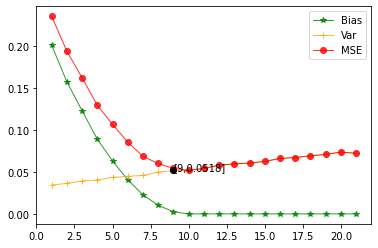

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
p=np.linspace(1,21,21)
mse_list=ms_li
plt.plot(p, b_li, 'r*-', color='green', alpha=0.8, linewidth=1, label="Bias")
plt.plot(p, va_li, 'r+-', color='orange', alpha=0.8, linewidth=1, label='Var')
plt.plot(p, mse_list, 'ro-', color='red', alpha=0.8, linewidth=1, label='MSE')
MSE_min=np.argmin(np.array(mse_list))
plt.legend()
plt.plot(MSE_min,mse_list[MSE_min],'ko') 
show_min='['+str(MSE_min)+','+str(round(mse_list[MSE_min],4))+']'
plt.annotate(show_min,xy=(MSE_min,mse_list[MSE_min]),xytext=(MSE_min,mse_list[MSE_min]))

从图上的趋势可以看出，MSE最大，呈U字形，bias越变越小，而var越来越大